In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 

### load dataset

In [7]:
house_rent_df = pd.read_csv('House_Rent_Dataset.csv')

In [9]:
house_rent_df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


## Data cleaning

In [17]:
#inspect null values
house_rent_df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [101]:
house_rent_df['Posted On'] = pd.to_datetime(house_rent_df['Posted On'])

In [103]:
house_rent_df.drop(columns=['Floor'], inplace=True)

In [105]:
house_rent_df['Month'] = house_rent_df['Posted On'].dt.month
house_rent_df.head()

,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Month
0,2022-05-18,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,5
1,2022-05-13,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5
2,2022-05-16,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5
3,2022-07-04,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,7
4,2022-05-09,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,5


In [31]:
house_rent_df.info() # check datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Posted On          4746 non-null   datetime64[ns]
 1   BHK                4746 non-null   int64         
 2   Rent               4746 non-null   int64         
 3   Size               4746 non-null   int64         
 4   Floor              4746 non-null   object        
 5   Area Type          4746 non-null   object        
 6   Area Locality      4746 non-null   object        
 7   City               4746 non-null   object        
 8   Furnishing Status  4746 non-null   object        
 9   Tenant Preferred   4746 non-null   object        
 10  Bathroom           4746 non-null   int64         
 11  Point of Contact   4746 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 445.1+ KB


## Exploratory data analysis

Text(0.5, 1.0, 'Average Size by BHK')

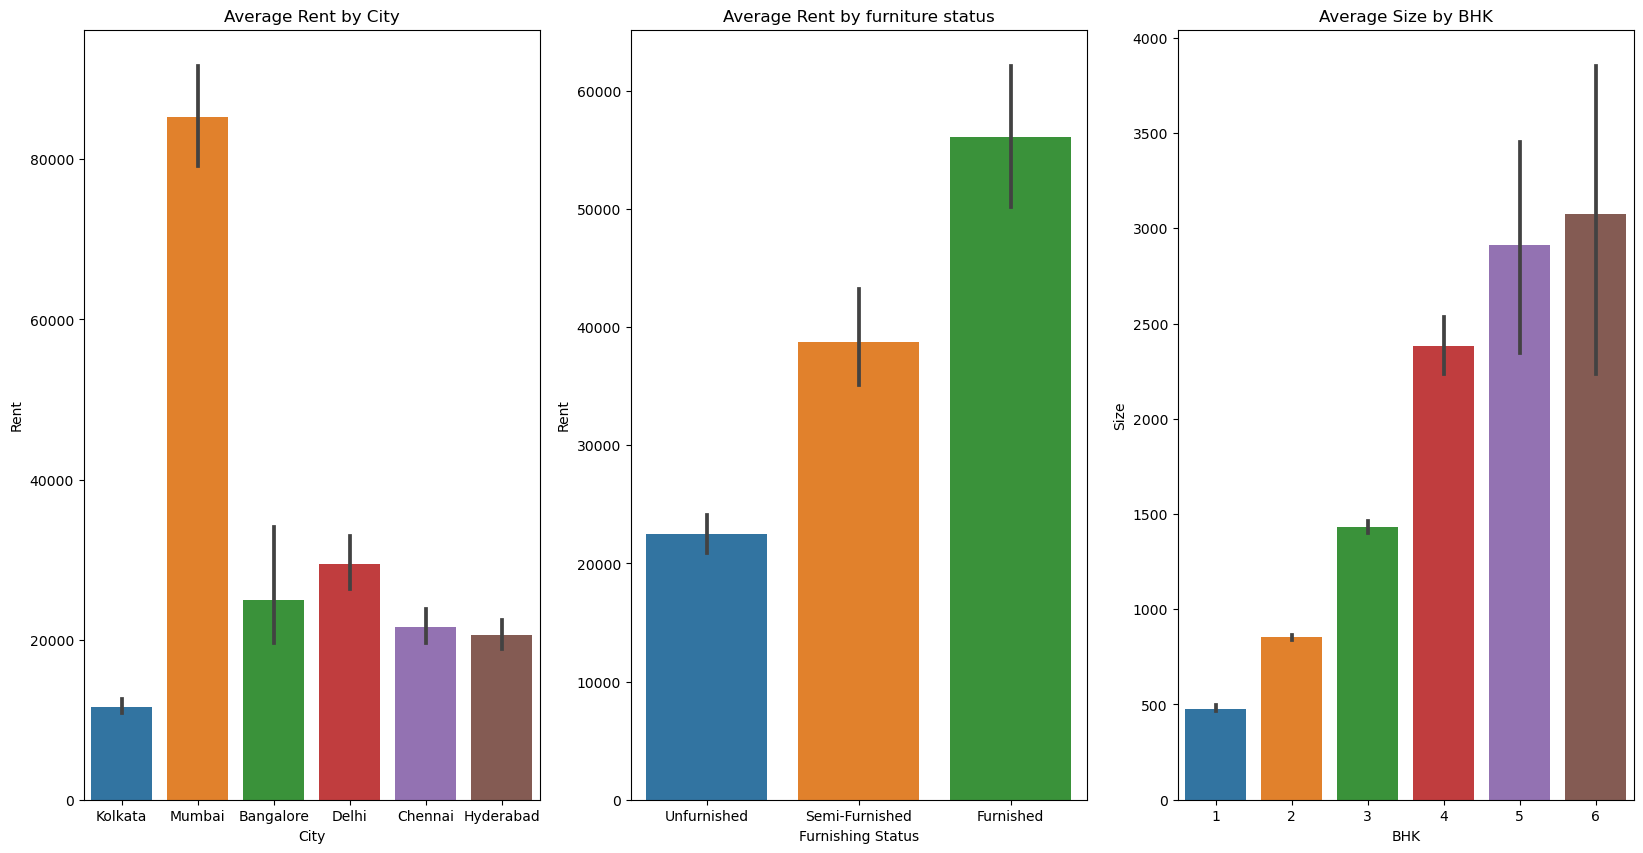

In [60]:
# bar chart

fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(20,10))
sns.barplot(data=house_rent_df, x = 'City', y = 'Rent', ax=axes[0])
sns.barplot(data=house_rent_df, x='Furnishing Status', y='Rent', ax=axes[1])
sns.barplot(data=house_rent_df, x='BHK', y='Size', ax=axes[2])

axes[0].set_title('Average Rent by City')
axes[1].set_title('Average Rent by furniture status')
axes[2].set_title('Average Size by BHK')

Text(0.5, 1.0, 'Number of Listings by Tenant Preferred')

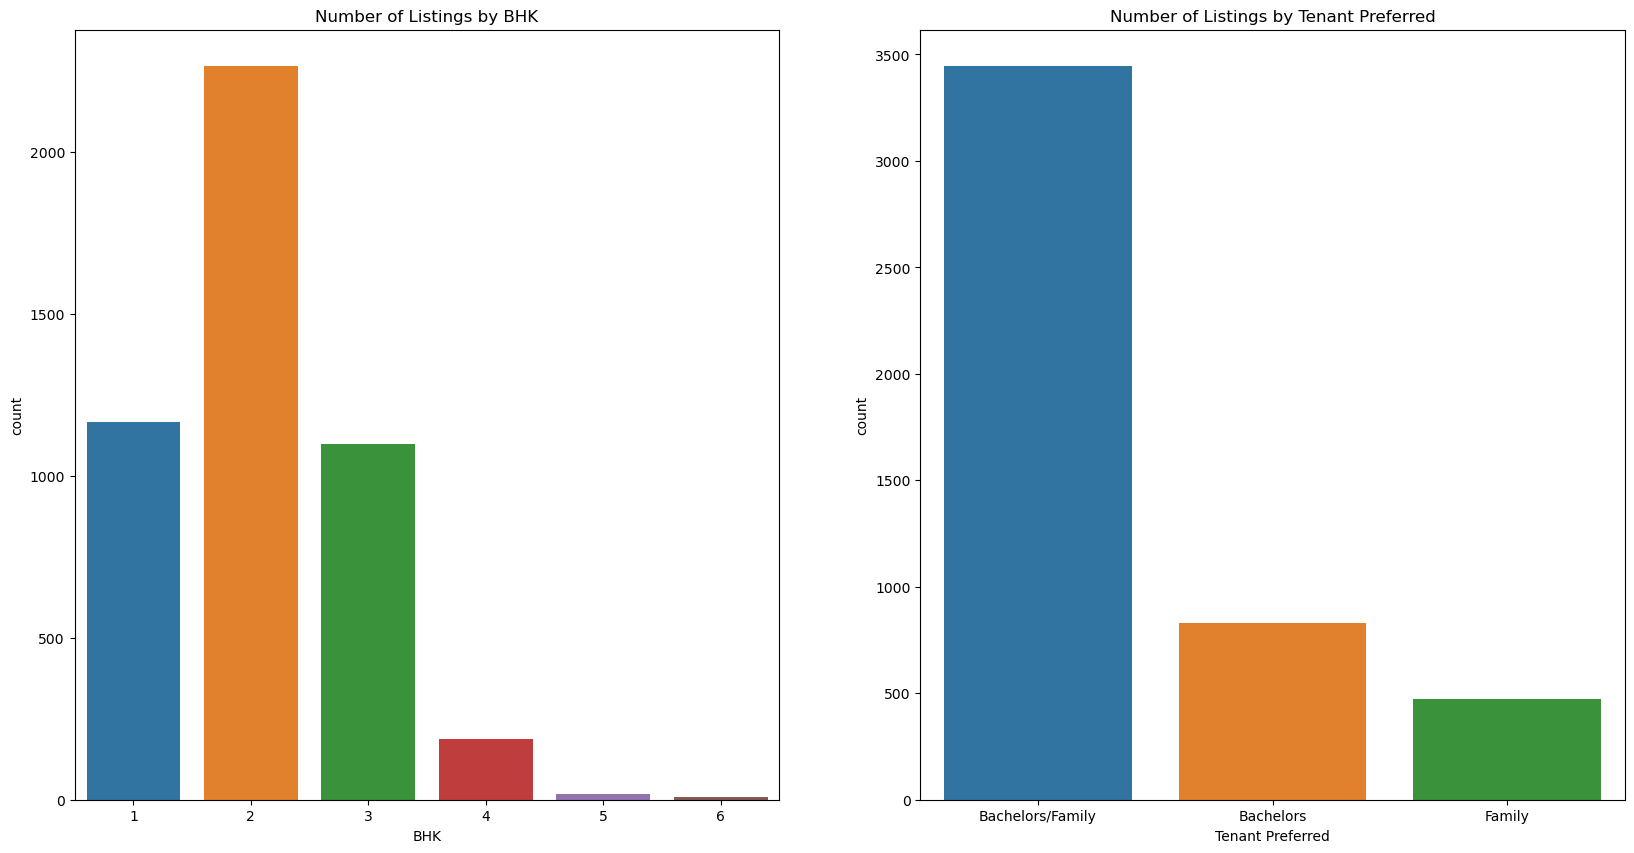

In [62]:
# bar chart

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(20,10))
sns.countplot(data=house_rent_df, x='BHK',  ax=axes[0])
sns.countplot(data=house_rent_df, x='Tenant Preferred', ax=axes[1])

axes[0].set_title('Number of Listings by BHK')
axes[1].set_title('Number of Listings by Tenant Preferred')

Text(0.5, 1.0, 'Rent distribution by month')

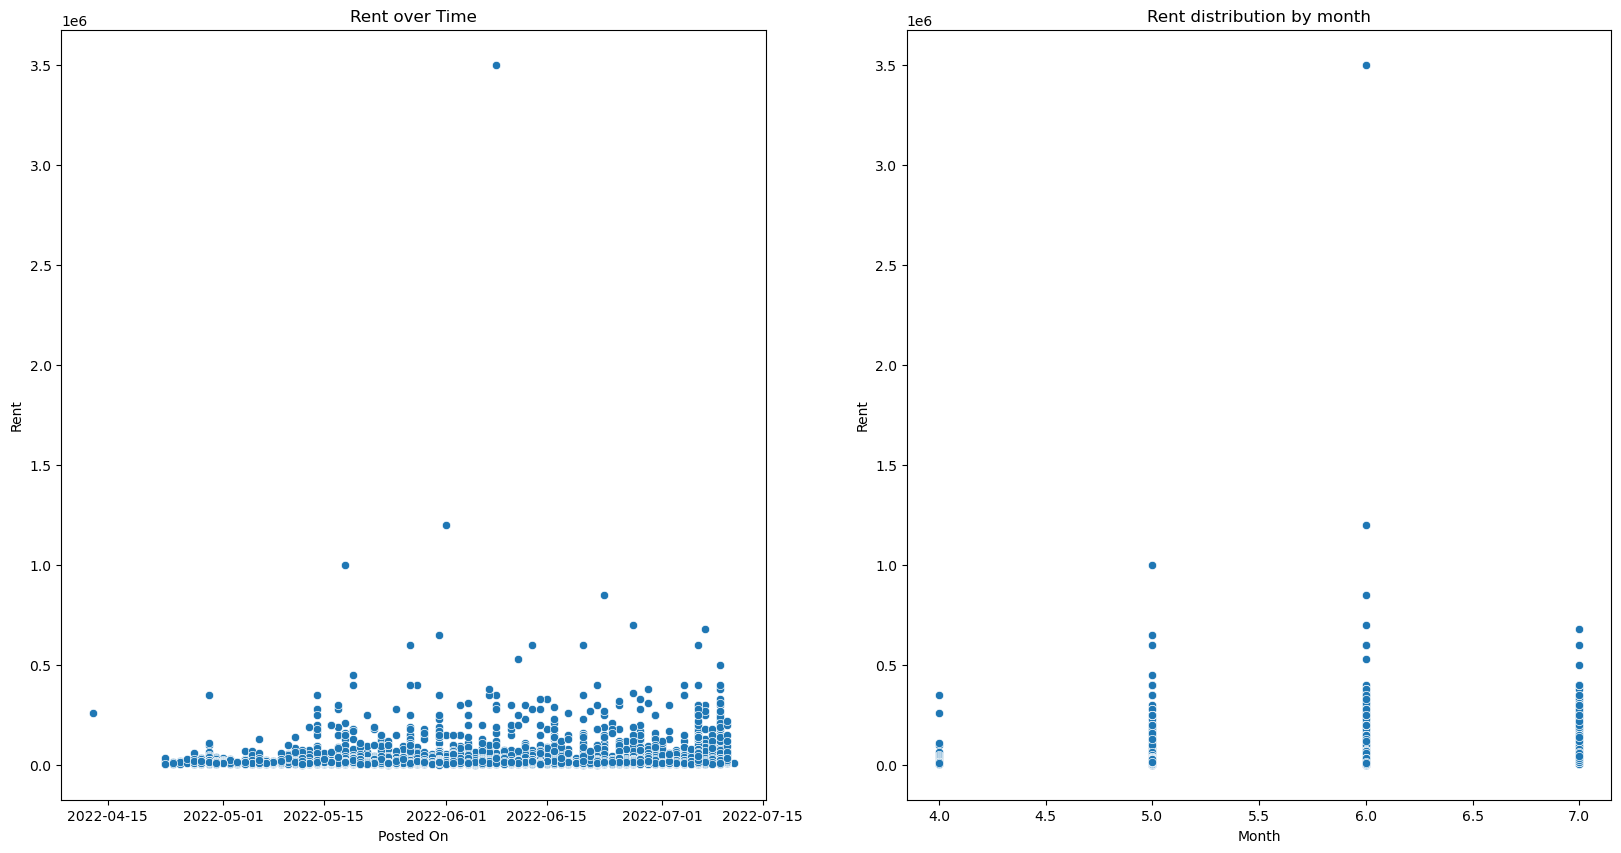

In [124]:
# scatterplot

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(20,10))
sns.scatterplot(data=house_rent_df, x='Posted On', y='Rent', ax=axes[0])
sns.scatterplot(data=house_rent_df, x='Month', y='Rent', ax=axes[1])

axes[0].set_title('Rent over Time')
axes[1].set_title('Rent distribution by month')

Text(0.5, 1.0, 'size vs BHK')

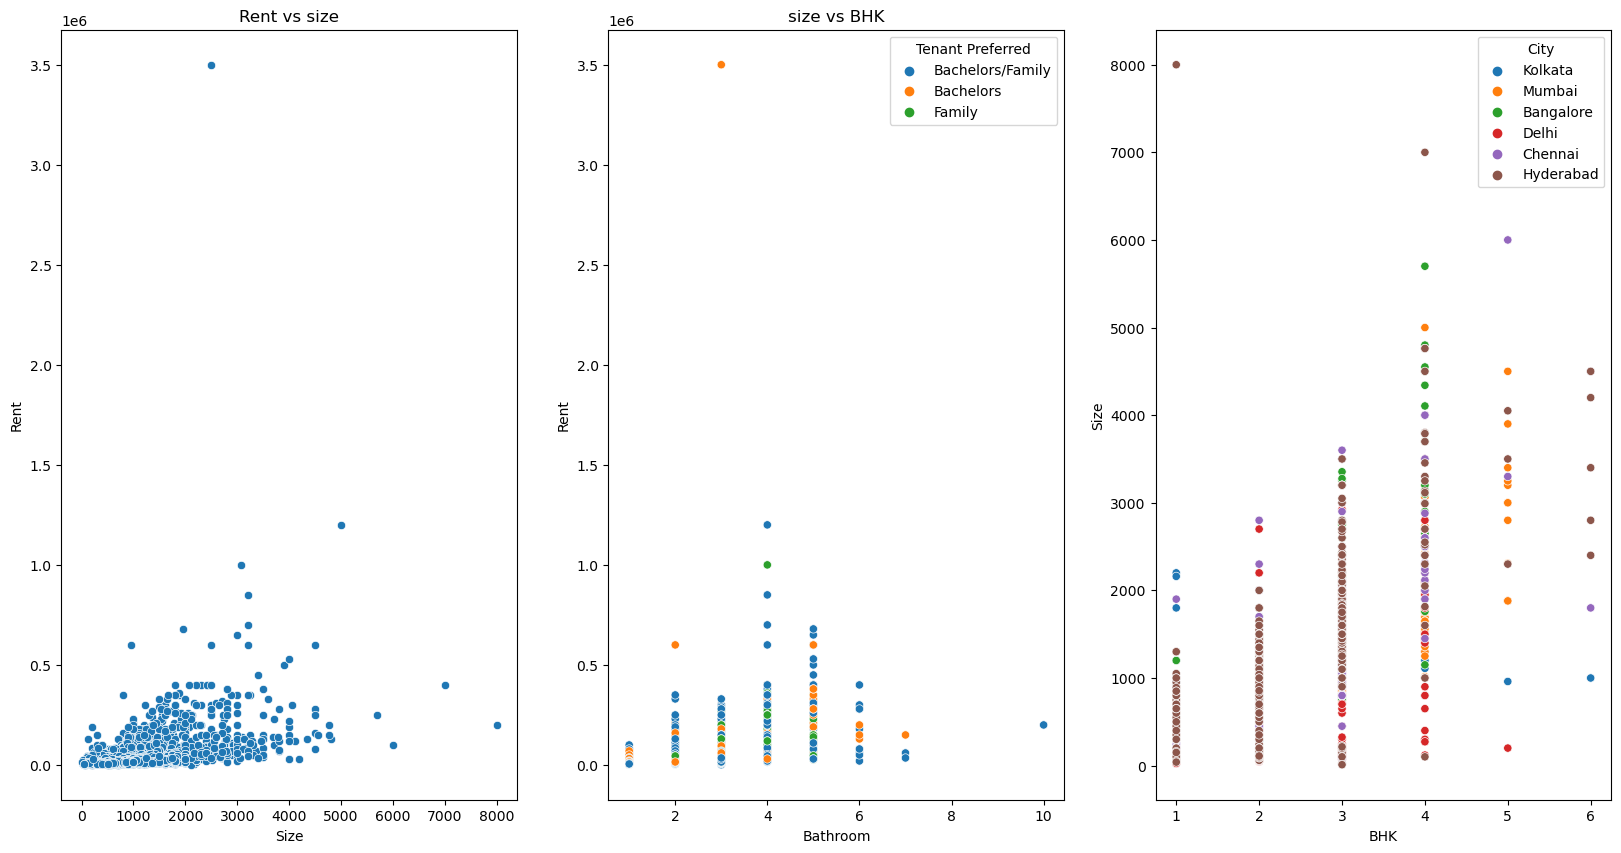

In [126]:
# scatterplot

fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(20,10))
sns.scatterplot(data=house_rent_df, x='Size', y='Rent',  ax=axes[0])
sns.scatterplot(data=house_rent_df, x='Bathroom', y='Rent', hue='Tenant Preferred', ax=axes[1])
sns.scatterplot(data=house_rent_df, x='BHK', y='Size', hue='City', ax=axes[2])


axes[0].set_title('Rent vs size')
axes[1].set_title('Rent vs Bathroom')
axes[1].set_title('size vs BHK')

Text(0.5, 1.0, 'Rent Distribution by Furnishing Status')

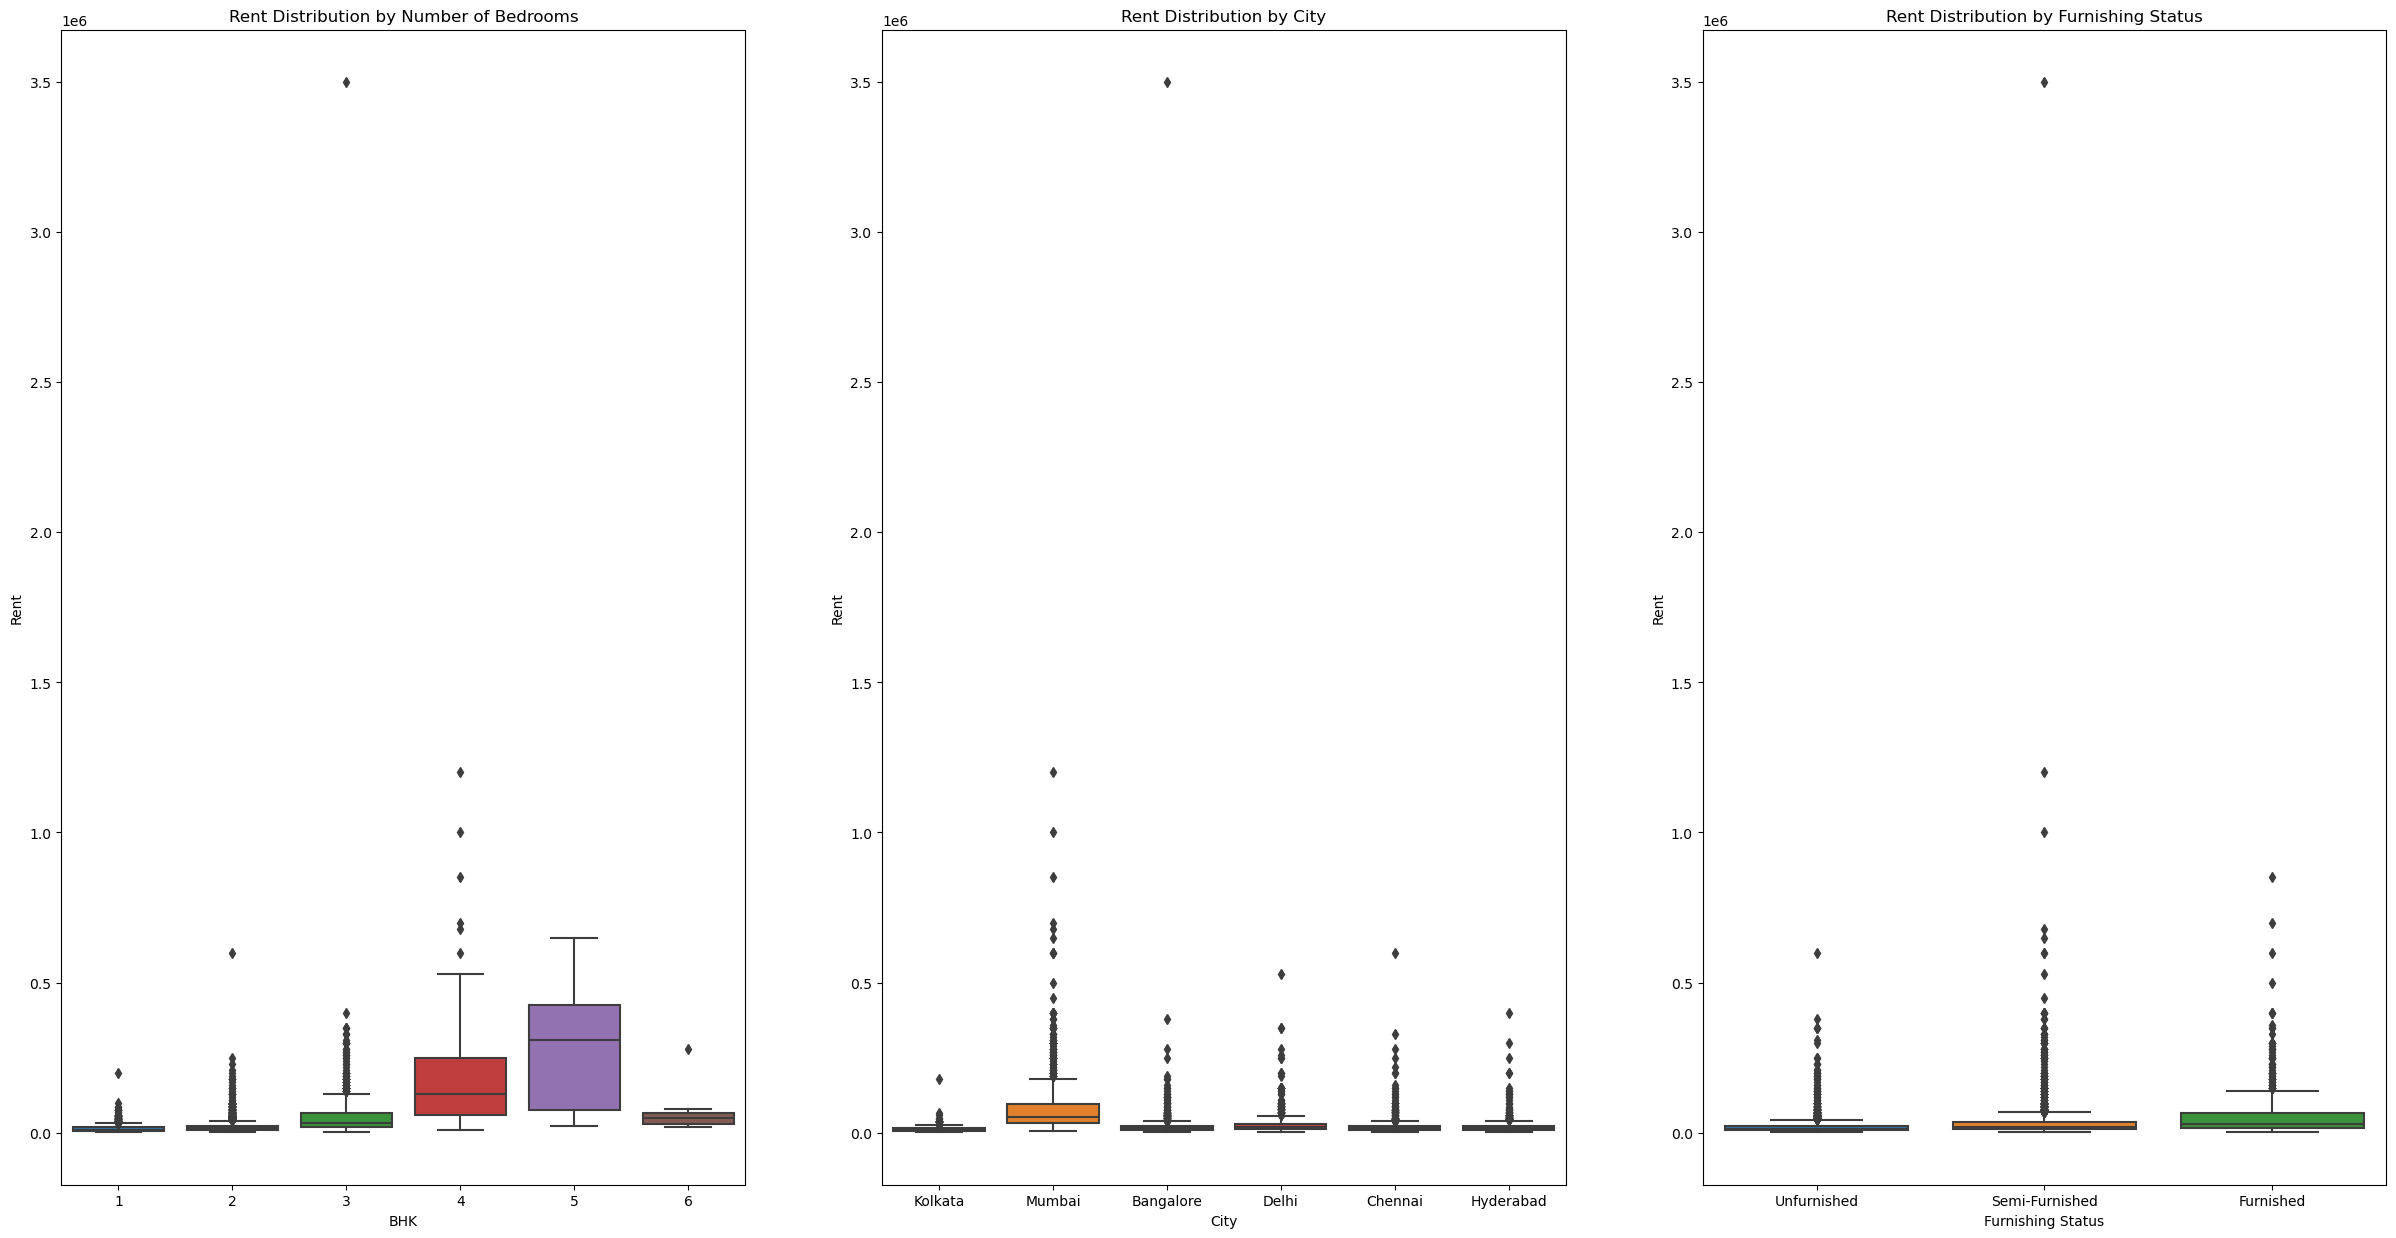

In [21]:
# box plot

fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(20, 15))
sns.boxplot(data=house_rent_df, x='BHK', y='Rent', ax=axes[0])
sns.boxplot(data=house_rent_df, x='City', y='Rent', ax=axes[1])
sns.boxplot(data=house_rent_df, x='Furnishing Status', y='Rent', ax=axes[2])

axes[0].set_title('Rent Distribution by Number of Bedrooms')
axes[1].set_title('Rent Distribution by City')
axes[2].set_title('Rent Distribution by Furnishing Status')

Text(0.5, 1.0, 'Rent Distribution by Tenant Preferred')

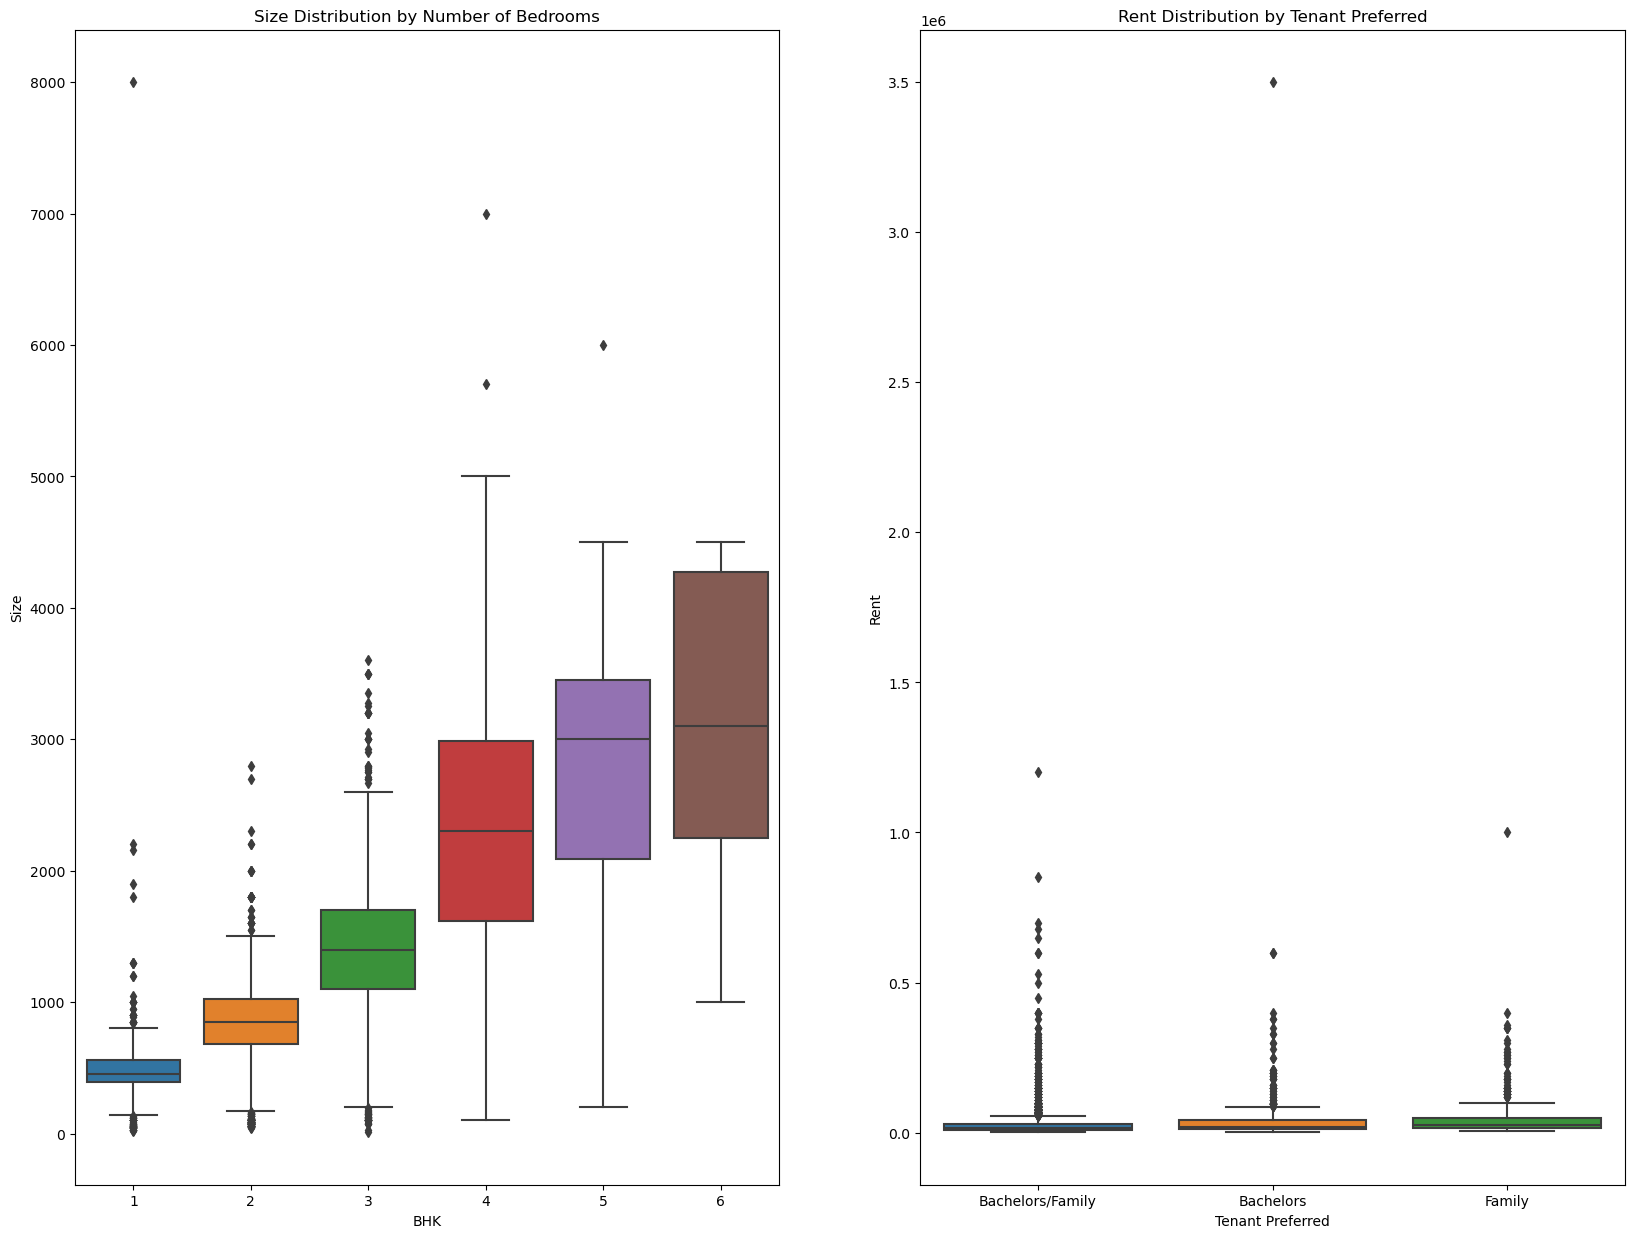

In [27]:
# box plot

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(20, 15))
sns.boxplot(data=house_rent_df, x='BHK', y='Size', ax=axes[0])
sns.boxplot(data=house_rent_df, x='Tenant Preferred', y='Rent', ax=axes[1])

axes[0].set_title('Size Distribution by Number of Bedrooms')
axes[1].set_title('Rent Distribution by Tenant Preferred')

Text(0.5, 1.0, 'Average Rent by month')

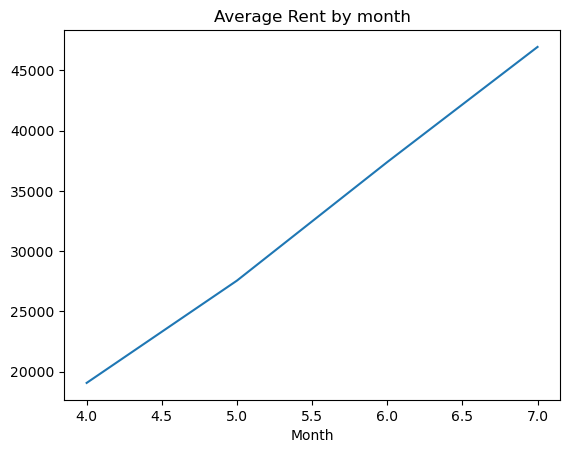

In [51]:
# line chart

data=house_rent_df.groupby('Month')['Rent'].mean().plot(kind='line')

plt.title('Average Rent by month')

Text(0.5, 1.0, 'Average Rent Over Time')

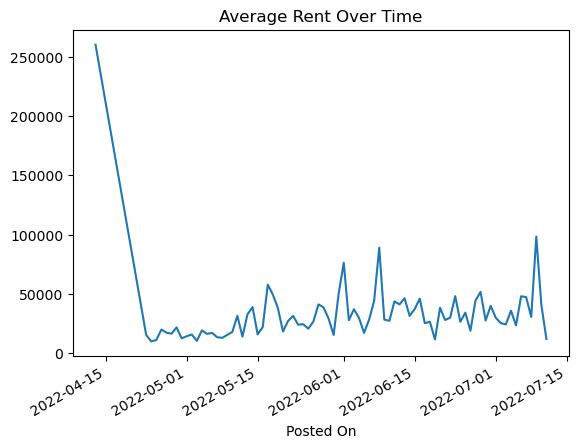

In [65]:
data=house_rent_df.groupby('Posted On')['Rent'].mean().plot(kind='line')
plt.title('Average Rent Over Time')

Text(0.5, 1.0, 'Distribution of Rentals by City')

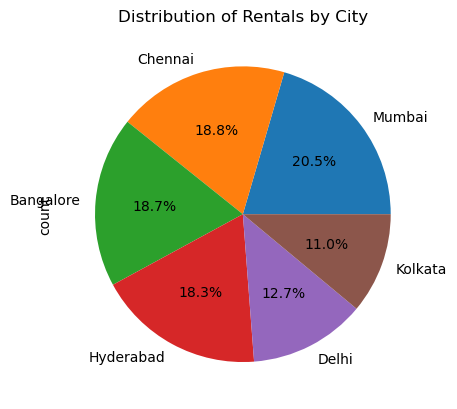

In [57]:
# pie chart

data=house_rent_df['City'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Rentals by City')

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Bathroom')

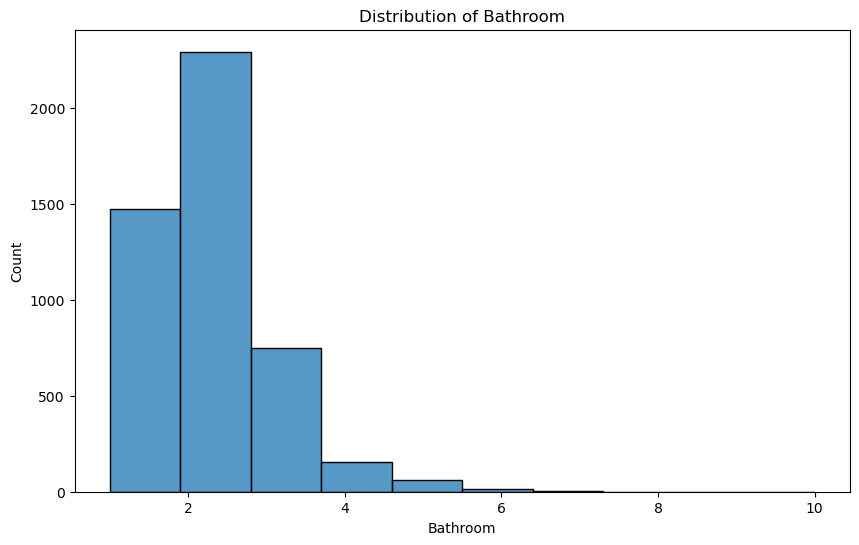

In [47]:
# histogram
plt.figure(figsize = (10,6))
sns.histplot(data=house_rent_df['Bathroom'], bins= 10, edgecolor='black', kde = False)

plt.title('Distribution of Bathroom')

Text(0.5, 1.0, 'Rent by city and Month')

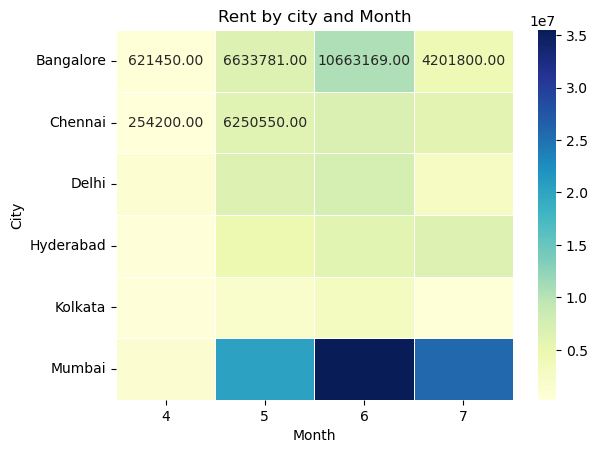

In [121]:
# heatmap
house_rent = house_rent_df.pivot_table(index='City', columns='Month', values='Rent', aggfunc='sum')
sns.heatmap(house_rent, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=.5)
plt.title('Rent by city and Month')


Text(0.5, 1.0, 'Rent Distribution by Number of BHK')

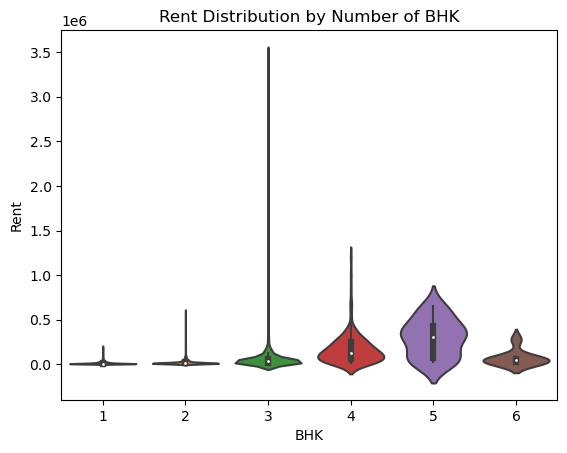

In [75]:
# violn plot

sns.violinplot(data=house_rent_df, x='BHK', y='Rent' , inner = 'box', scale= 'width')
plt.title('Rent Distribution by Number of BHK')